<a href="https://colab.research.google.com/github/ArnoldoOliva/DatosMasivos/blob/main/IMBD_REVIEWS_for_sentiment_analysis_Arnoldo_Oliva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tweepy

In [9]:
import tweepy

bearertoken="AAAAAAAAAAAAAAAAAAAAAOvUnwEAAAAArH0h8TvQEbjvRsFcesvGkBm68xM%3DtGobfbOUCktiaMWFPzc6i4qVb2gIpP9NIRlVZRGnltCrP7t1SI"

#CLIENTID="Q3lmc19pMEdGLUlNMFFqdnBva0M6MTpjaQ"
#CLIENTSECRET="Kbcv1Br3a83Xw_01hXchfcLr6_90wVnKlUOcVyRuFrDT00fmBI"

# API credentials
api_key = "5ugXzEjAgHZvpQGuTpJG0Er6k"
api_key_secret = "3Z7g23aNPZAYuoVDFy9t1q9bIKCwViG9xrYfv7q5ZL9RHybv3o"

access_token = "1665155460054261763-e6GkU08aljZjF8fi2qvqujn9g4Nm84"
access_token_secret = "DJYQRzVPQNeVAGyg0piK0Q75b4eo1WZGCqANfai2yBsEQ"

# authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)


# Create API object
api = tweepy.API(auth)

# Search parameters
query = 'Elecciones Estado de Mexico'
num_tweets = 100  # Number of tweets to retrieve

# Search tweets
#tweets=api.search_tweets(q=query,count =num_tweets,lang="es")
tweets=api.user_timeline(user_id="@AristeguiOnline", screen_name="Aristegui Noticias", 
                         count=num_tweets)


# Process tweets
# create dataframe
columns = ['Time', 'User', 'Tweet']
data = []
for tweet in tweets:
    data.append([tweet.created_at, tweet.user.screen_name, tweet.text])

dftweets = pd.DataFrame(data, columns=columns)

dftweets.to_csv('tweets.csv')
dftweets

Forbidden: ignored

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import string
import re

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("/content/Test.csv")
data

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0
...,...,...
4995,This is the kind of picture John Lassiter woul...,1
4996,A MUST SEE! I saw WHIPPED at a press screening...,1
4997,NBC should be ashamed. I wouldn't allow my chi...,0
4998,This movie is a clumsy mishmash of various gho...,0


In [4]:
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''
    
    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)  #los numeros importan
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    
    return(nuevo_texto)

test = data.loc[1,"text"]
print(test)
print()
print(limpiar_tokenizar(texto=test))

1st watched 12/7/2002 - 3 out of 10(Dir-Steve Purcell): Typical Mary Kate & Ashley fare with a few more kisses. It looks to me like the girls are getting pretty tired of this stuff and it will be interesting what happens to them if they ever decide to split up and go there own ways. In this episode of their adventures they are interns in Rome for a `fashion' designer who puts them right into the mailroom to learn what working hard is all about(I guess..). Besides the typical flirtations with boys there is nothing much else except the Rome scenario until about ¾ way into the movie when it's finally revealed why they are getting fired, then re-hired, then fired again, then re-hired again. This is definetly made by people who don't understand the corporate world and it shows in their interpretation of it. Maybe the real world will be their next adventure(if there is one.). Even my kids didn't seem to care for this boring `adventure' in the make-believe. Let's see they probably only have a

In [6]:
data['texto_tokenizado'] = data['text'].apply(lambda x: limpiar_tokenizar(x))
data["review"]=data.index
data.head()

,text,label,texto_tokenizado,review
0,I always wrote this series off as being a comp...,0,"[always, wrote, this, series, off, as, being, ...",0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,"[st, watched, out, of, dir, steve, purcell, ty...",1
2,This movie was so poorly written and directed ...,0,"[this, movie, was, so, poorly, written, and, d...",2
3,The most interesting thing about Miryang (Secr...,1,"[the, most, interesting, thing, about, miryang...",3
4,"when i first read about ""berlin am meer"" i did...",0,"[when, first, read, about, berlin, am, meer, d...",4


In [7]:
data.loc[data.label==0,"label2"]="negativo"
data.loc[data.label==1,"label2"]="positivo"

In [8]:
data['num_words']=data["texto_tokenizado"].apply(lambda x: len(x))
print("Media palabras en opiniones positivas: ",np.mean(data.loc[data.label==1]["num_words"]))
print("Media palabras en opiniones negativas: ",np.mean(data.loc[data.label==0]["num_words"]))
print()

print("Desv est palabras en opiniones positivas: ",np.std(data.loc[data.label==1]["num_words"]))
print("Desv est palabras en opiniones negativas: ",np.std(data.loc[data.label==0]["num_words"]))

Media palabras en opiniones positivas:  221.14131736526946
Media palabras en opiniones negativas:  227.28496993987977

Desv est palabras en opiniones positivas:  172.59445384618866
Desv est palabras en opiniones negativas:  167.86539648546852


In [9]:
data2 = data.explode(column='texto_tokenizado')
data2 = data2.drop(columns='text')
data2 = data2.rename(columns={'texto_tokenizado':'token'})

In [10]:
# Top 5 palabras más utilizadas por cada tipo de review (positivo, negativo)
# ==============================================================================

data2.groupby(['label2','token'])['token'] \
 .count() \
 .reset_index(name='count') \
 .groupby('label2') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(5))


label2 token  count
label2                               
negativo 23888  negativo   the  33666
         813    negativo   and  14969
         16444  negativo    of  14114
         24178  negativo    to  14075
         2739   negativo    br  10371
positivo 52152  positivo   the  33545
         27769  positivo   and  17473
         44333  positivo    of  14993
         52456  positivo    to  12741
         40149  positivo    is  10945

In [11]:
nltk.download('stopwords')
# Obtención de listado de stopwords del inglés
# ==============================================================================
stop_words = list(stopwords.words('english'))
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("amp", "xa", "xe"))
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
# Filtrado para excluir stopwords
# ==============================================================================
data2 = data2[~(data2["token"].isin(stop_words))]

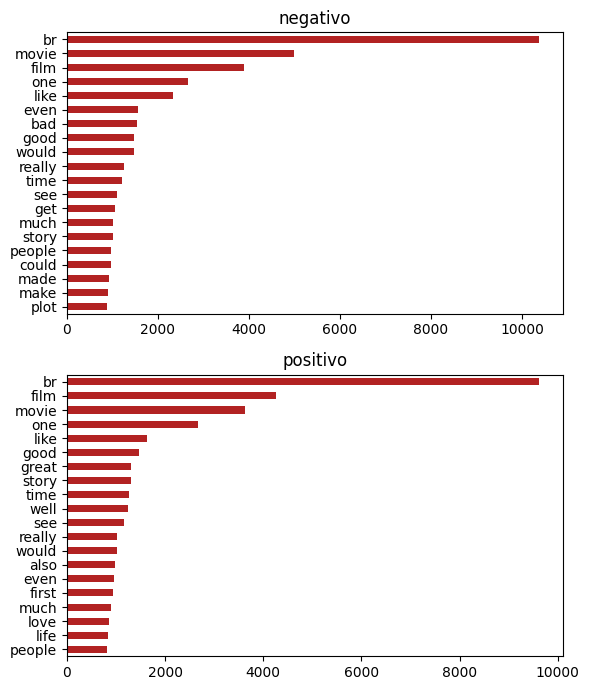

In [13]:
# Top 20 palabras por tipo de review (sin stopwords)
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(6, 7))
for i, label2 in enumerate(data2.label2.unique()):
    df_temp = data2[data2.label2 == label2]
    counts  = df_temp['token'].value_counts(ascending=False).head(20)
    counts.plot(kind='barh', color='firebrick', ax=axs[i])
    axs[i].invert_yaxis()
    axs[i].set_title(label2)

fig.tight_layout()

In [14]:
# Descarga lexicon sentimientos
# ==============================================================================
lexicon = pd.read_table(
            'https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-en-165.txt',
            names = ['termino', 'sentimiento']
          )
lexicon.head()

,termino,sentimiento
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [15]:
# Sentimiento promedio de cada review
# ==============================================================================
review_sentimientos = pd.merge(
                            left     = data2,
                            right    = lexicon,
                            left_on  = "token", 
                            right_on = "termino",
                            how      = "inner"
                      )

review_sentimientos = review_sentimientos.drop(columns = "termino")

# Se suman los sentimientos de las palabras que forman cada tweet.
review_sentimientos = review_sentimientos[["review", "label2", "sentimiento"]] \
                      .groupby(["review"])\
                      .sum().reset_index()
review_sentimientos.head()

,review,sentimiento
0,0,24
1,1,4
2,2,-14
3,3,-30
4,4,-9


In [ ]:
data.loc[0,"text"]

In [ ]:
def perfil_sentimientos(df):
    print(review)
    print("=" * 12)
    print(f"Positivos: {round(100 * np.mean(df.sentimiento > 0), 2)}")
    print(f"Neutros  : {round(100 * np.mean(df.sentimiento == 0), 2)}")
    print(f"Negativos: {round(100 * np.mean(df.sentimiento < 0), 2)}")
    print(" ")

for review, df in review_sentimientos.groupby("review"):
    perfil_sentimientos(df)

In [20]:
# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
data['Cleaned Reviews'] = data['text'].apply(clean)


In [22]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

data['post cleaned'] = data['Cleaned Reviews'].apply(token_stop_pos)
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,text,label,texto_tokenizado,review,label2,num_words,Cleaned Reviews,post cleaned
0,I always wrote this series off as being a comp...,0,"[always, wrote, this, series, off, as, being, ...",0,negativo,367,I always wrote this series off as being a comp...,"[(always, r), (wrote, v), (series, n), (comple..."
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,"[st, watched, out, of, dir, steve, purcell, ty...",1,negativo,188,st watched out of Dir Steve Purcell Typical M...,"[(st, n), (watched, v), (Dir, n), (Steve, n), ..."
2,This movie was so poorly written and directed ...,0,"[this, movie, was, so, poorly, written, and, d...",2,negativo,247,This movie was so poorly written and directed ...,"[(movie, n), (poorly, r), (written, v), (direc..."
3,The most interesting thing about Miryang (Secr...,1,"[the, most, interesting, thing, about, miryang...",3,positivo,732,The most interesting thing about Miryang Secre...,"[(interesting, a), (thing, n), (Miryang, n), (..."
4,"when i first read about ""berlin am meer"" i did...",0,"[when, first, read, about, berlin, am, meer, d...",4,negativo,169,when i first read about berlin am meer i didn ...,"[(first, r), (read, v), (berlin, n), (meer, n)..."


In [25]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
data['Lemma'] = data['post cleaned'].apply(lemmatize)
data.head(5)

,text,label,texto_tokenizado,review,label2,num_words,Cleaned Reviews,post cleaned,Lemma
0,I always wrote this series off as being a comp...,0,"[always, wrote, this, series, off, as, being, ...",0,negativo,367,I always wrote this series off as being a comp...,"[(always, r), (wrote, v), (series, n), (comple...",always write series complete stink fest Jim ...
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,"[st, watched, out, of, dir, steve, purcell, ty...",1,negativo,188,st watched out of Dir Steve Purcell Typical M...,"[(st, n), (watched, v), (Dir, n), (Steve, n), ...",st watch Dir Steve Purcell Typical Mary Kate...
2,This movie was so poorly written and directed ...,0,"[this, movie, was, so, poorly, written, and, d...",2,negativo,247,This movie was so poorly written and directed ...,"[(movie, n), (poorly, r), (written, v), (direc...",movie poorly write direct fell asleep minute...
3,The most interesting thing about Miryang (Secr...,1,"[the, most, interesting, thing, about, miryang...",3,positivo,732,The most interesting thing about Miryang Secre...,"[(interesting, a), (thing, n), (Miryang, n), (...",interesting thing Miryang Secret Sunshine ac...
4,"when i first read about ""berlin am meer"" i did...",0,"[when, first, read, about, berlin, am, meer, d...",4,negativo,169,when i first read about berlin am meer i didn ...,"[(first, r), (read, v), (berlin, n), (meer, n)...",first read berlin meer expect much thought r...


In [18]:
data.label2.value_counts()

positivo    2505
negativo    2495
Name: label2, dtype: int64

In [19]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [26]:
data['Polarity'] = data['Lemma'].apply(getPolarity) 
data['Analysis'] = data['Polarity'].apply(analysis)
data.head()

,text,label,texto_tokenizado,review,label2,num_words,Cleaned Reviews,post cleaned,Lemma,Polarity,Analysis
0,I always wrote this series off as being a comp...,0,"[always, wrote, this, series, off, as, being, ...",0,negativo,367,I always wrote this series off as being a comp...,"[(always, r), (wrote, v), (series, n), (comple...",always write series complete stink fest Jim ...,0.144573,Positive
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,"[st, watched, out, of, dir, steve, purcell, ty...",1,negativo,188,st watched out of Dir Steve Purcell Typical M...,"[(st, n), (watched, v), (Dir, n), (Steve, n), ...",st watch Dir Steve Purcell Typical Mary Kate...,-0.029945,Negative
2,This movie was so poorly written and directed ...,0,"[this, movie, was, so, poorly, written, and, d...",2,negativo,247,This movie was so poorly written and directed ...,"[(movie, n), (poorly, r), (written, v), (direc...",movie poorly write direct fell asleep minute...,-0.106667,Negative
3,The most interesting thing about Miryang (Secr...,1,"[the, most, interesting, thing, about, miryang...",3,positivo,732,The most interesting thing about Miryang Secre...,"[(interesting, a), (thing, n), (Miryang, n), (...",interesting thing Miryang Secret Sunshine ac...,-0.012945,Negative
4,"when i first read about ""berlin am meer"" i did...",0,"[when, first, read, about, berlin, am, meer, d...",4,negativo,169,when i first read about berlin am meer i didn ...,"[(first, r), (read, v), (berlin, n), (meer, n)...",first read berlin meer expect much thought r...,-0.008700,Negative


In [33]:
data.label.value_counts()

1    2505
0    2495
Name: label, dtype: int64

In [30]:
pd.crosstab(data['label2'], data['Analysis']) # se puede mejorar

Analysis,Negative,Positive
label2,,
negativo,1171,1324
positivo,165,2340


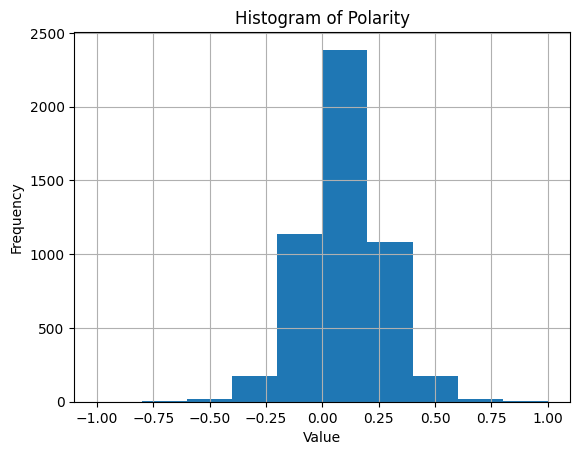

In [32]:
data['Polarity'].hist()

# Set the title and labels
plt.title('Histogram of Polarity')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

In [34]:
# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score >= 0.25:
        return 'Positive'
    else:
        return 'Neutral'

In [35]:
data['Polarity'] = data['Lemma'].apply(getPolarity) 
data['Analysis'] = data['Polarity'].apply(analysis)
data.head()

,text,label,texto_tokenizado,review,label2,num_words,Cleaned Reviews,post cleaned,Lemma,Polarity,Analysis
0,I always wrote this series off as being a comp...,0,"[always, wrote, this, series, off, as, being, ...",0,negativo,367,I always wrote this series off as being a comp...,"[(always, r), (wrote, v), (series, n), (comple...",always write series complete stink fest Jim ...,0.144573,Neutral
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,"[st, watched, out, of, dir, steve, purcell, ty...",1,negativo,188,st watched out of Dir Steve Purcell Typical M...,"[(st, n), (watched, v), (Dir, n), (Steve, n), ...",st watch Dir Steve Purcell Typical Mary Kate...,-0.029945,Negative
2,This movie was so poorly written and directed ...,0,"[this, movie, was, so, poorly, written, and, d...",2,negativo,247,This movie was so poorly written and directed ...,"[(movie, n), (poorly, r), (written, v), (direc...",movie poorly write direct fell asleep minute...,-0.106667,Negative
3,The most interesting thing about Miryang (Secr...,1,"[the, most, interesting, thing, about, miryang...",3,positivo,732,The most interesting thing about Miryang Secre...,"[(interesting, a), (thing, n), (Miryang, n), (...",interesting thing Miryang Secret Sunshine ac...,-0.012945,Negative
4,"when i first read about ""berlin am meer"" i did...",0,"[when, first, read, about, berlin, am, meer, d...",4,negativo,169,when i first read about berlin am meer i didn ...,"[(first, r), (read, v), (berlin, n), (meer, n)...",first read berlin meer expect much thought r...,-0.008700,Negative


In [37]:
pd.crosstab(data['label2'], data['Analysis'],normalize="columns") # se puede mejorar

Analysis,Negative,Neutral,Positive
label2,,,
negativo,0.876497,0.443617,0.086493
positivo,0.123503,0.556383,0.913507


([<matplotlib.patches.Wedge at 0x7f1034784bb0>,
 [Text(-0.21968101408782756, 1.0778405503827289, 'Neutral'),
  Text(-0.35565515631354644, -1.0409175806890703, 'Negative'),
  Text(1.1645841860350374, -0.6828203816796254, 'Positive')],
 [Text(-0.11982600768426957, 0.5879130274814884, '56.4%'),
  Text(-0.19399372162557077, -0.5677732258304019, '26.7%'),
  Text(0.7332567097257643, -0.4299239440205049, '16.9%')])

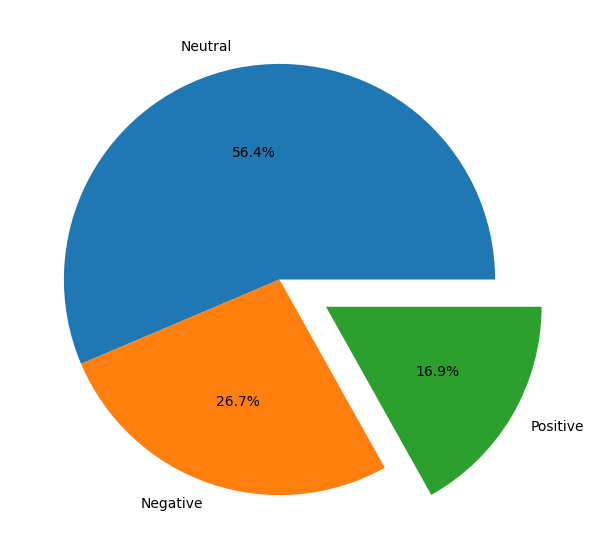

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_count.values, labels = tb_count.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [42]:
data.loc[data.Analysis=="Positive","label3"]=1
data.loc[data.Analysis=="Neutral","label3"]=0
data.loc[data.Analysis=="Negative","label3"]=-1

# Aplicando modelo con paralelizacion

In [43]:
features = data["text"].values
labels = data["label3"].values

In [44]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [45]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [49]:
arr=processed_features
mean = np.mean(arr)
std = np.std(arr)
min_value = np.min(arr)
max_value = np.max(arr)

# Imprimir el resumen estadístico
print("Mean:", mean)
print("Standard Deviation:", std)
print("Minimum Value:", min_value)
print("Maximum Value:", max_value)

Mean: 0.0028565400840823377
Standard Deviation: 0.01979495336564428
Minimum Value: 0.0
Maximum Value: 0.8776840930871557


In [52]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from joblib import parallel_backend

In [53]:
# Crear un clasificador SVM
classifier = svm.SVC(kernel='linear')

# Entrenar el clasificador utilizando paralelización
with parallel_backend('threading'):
    classifier.fit(X_train, y_train)

# Predecir las clases para los datos de prueba
y_pred = classifier.predict(X_test)

# Calcular la precisión de la clasificación
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.749


In [59]:
series = pd.Series(y_test)
series2 = pd.Series(y_pred)

# Obtener el recuento de valores únicos utilizando value_counts
value_counts = series.value_counts()
value_counts2 = series2.value_counts()
print(value_counts)
print()
print(value_counts2)

 0.0    576
-1.0    261
 1.0    163
dtype: int64

 0.0    702
-1.0    192
 1.0    106
dtype: int64


In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred,labels=[-1,0,1]))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[154 106   1]
 [ 38 514  24]
 [  0  82  81]]
              precision    recall  f1-score   support

        -1.0       0.80      0.59      0.68       261
         0.0       0.73      0.89      0.80       576
         1.0       0.76      0.50      0.60       163

    accuracy                           0.75      1000
   macro avg       0.77      0.66      0.70      1000
weighted avg       0.76      0.75      0.74      1000

0.749


([<matplotlib.patches.Wedge at 0x7f10257df730>,
 [Text(-0.26014881346968594, 1.068794926471077, '0.0'),
  Text(-0.2969212643263205, -1.059168429849974, '-1.0'),
  Text(1.176831931691629, -0.661488174158049, '1.0')],
 [Text(-0.14189935280164687, 0.5829790508024055, '57.6%'),
  Text(-0.16195705326890208, -0.5777282344636221, '26.1%'),
  Text(0.740968253287322, -0.41649255409951225, '16.3%')])

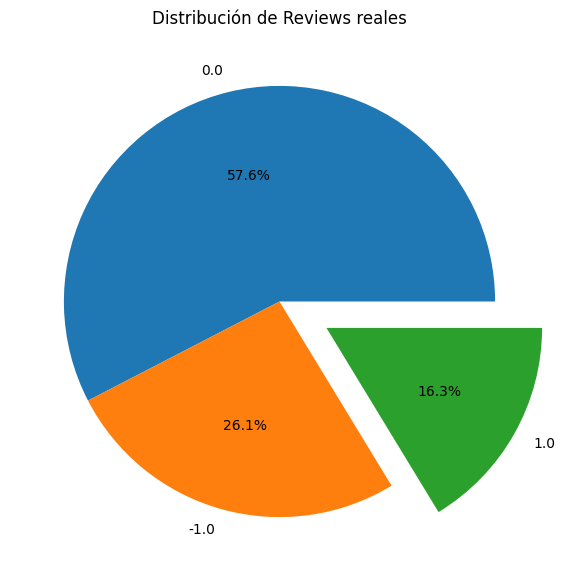

In [64]:
real= value_counts
plt.figure(figsize=(10, 7))
plt.title('Distribución de Reviews reales')
plt.pie(real.values, labels = real.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

([<matplotlib.patches.Wedge at 0x7f10259448b0>,
 [Text(-0.6521425632196803, 0.8858386293435534, '0.0'),
  Text(0.3267458899997187, -1.0503509524765007, '-1.0'),
  Text(1.275835215204122, -0.44129865583870975, '1.0')],
 [Text(-0.35571412539255287, 0.4831847069146654, '70.2%'),
  Text(0.17822503090893746, -0.5729187013508185, '19.2%'),
  Text(0.80330365401741, -0.27785470923178024, '10.6%')])

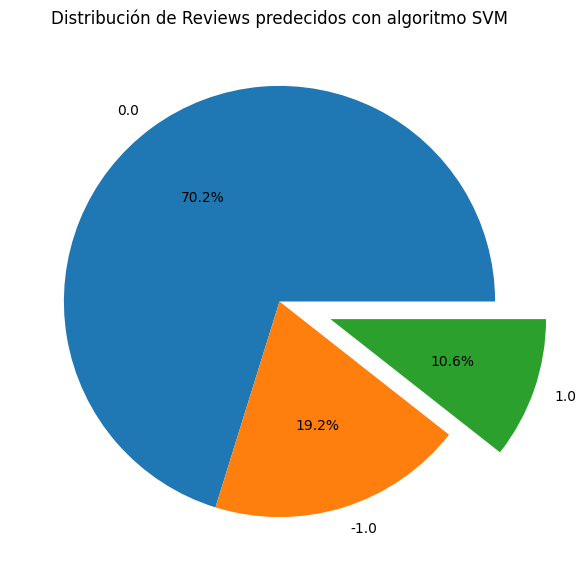

In [65]:
predichos= value_counts2
plt.figure(figsize=(10, 7))
plt.title('Distribución de Reviews predecidos con algoritmo SVM')
plt.pie(predichos.values, labels = real.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)